In [ ]:
import os
os.chdir("/content/drive/MyDrive/Machine Learning Projects/Applicant of Students")

In [ ]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data ⌛

Dataset contains information about applicants and their respective chances of being admitted to a graduate program, with various features providing details about their academic background, test scores, and other relevant aspects.

**GRE Score:** This is likely the Graduate Record Examination (GRE) score, which is a standardized test widely used for graduate admissions in the United States and many other countries. It assesses verbal reasoning, quantitative reasoning, and analytical writing skills.

**TOEFL Score:** This is probably the Test of English as a Foreign Language (TOEFL) score. It measures the English proficiency of non-native speakers who wish to enroll in English-speaking universities.

**University Rating:** This could represent the ranking or reputation of the university from which the applicant obtained their previous degree. It might be a numerical value indicating the university's perceived quality.

**SOP (Statement of Purpose):** This is likely a subjective document written by the applicant, explaining their reasons for pursuing a particular program, their academic and research interests, and career goals.

**LOR (Letters of Recommendation):** These are reference letters written by individuals who can vouch for the applicant's qualifications, usually professors or employers.

**CGPA (Cumulative Grade Point Average):** This is a measure of a student's academic performance, typically on a scale of 0 to 4.0.

**Research:** This binary variable (0 or 1) may indicate whether the applicant has research experience. Research experience can be a significant factor in graduate admissions, especially for research-focused programs.

**Chance of Admit:** This is likely the target variable or dependent variable, representing the probability or likelihood of the applicant being admitted to the graduate program. It could be expressed as a percentage or a value between 0 and 1.

In [ ]:
# Read data using pandas
data = pd.read_csv("adm_data.csv")

# Look the head of data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


I want to keep simple for **clustering** method so remove and renmae some attributes.

In [ ]:
# Remove the column
data.drop(["Serial No.", "University Rating", "Research", "Chance of Admit "], axis=1, inplace=True)

# Rename
data = data.rename(columns={"GRE Score":"GRE", "TOEFL Score":"TOEFL"})

# Look at the first column
data.head()

,GRE,TOEFL,SOP,LOR,CGPA
0,337,118,4.5,4.5,9.65
1,324,107,4.0,4.5,8.87
2,316,104,3.0,3.5,8.00
3,322,110,3.5,2.5,8.67
4,314,103,2.0,3.0,8.21


How many instance we have ❓

In [ ]:
# Basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GRE     400 non-null    int64  
 1   TOEFL   400 non-null    int64  
 2   SOP     400 non-null    float64
 3   LOR     400 non-null    float64
 4   CGPA    400 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 15.8 KB


We have **400** instances andthere is no missing values in dataset.

In [ ]:
# Descritive Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE,400.0,316.807500,11.473646,290.0,308.00,317.00,325.0000,340.00
TOEFL,400.0,107.410000,6.069514,92.0,103.00,107.00,112.0000,120.00
SOP,400.0,3.400000,1.006869,1.0,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.0,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.8,8.17,8.61,9.0625,9.92


## Data Exploratory Analysis

Is there any correlation between these attributes ❓

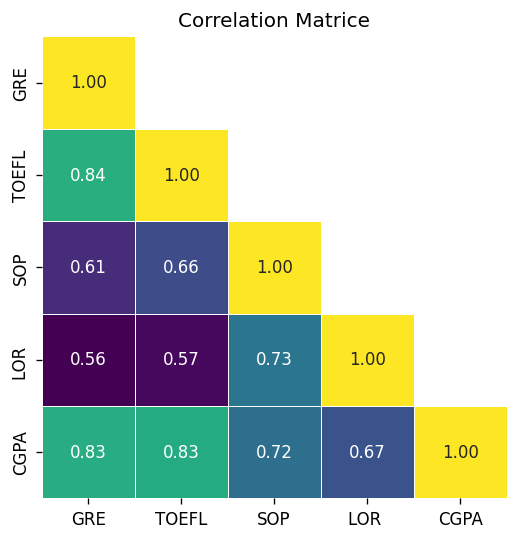

In [ ]:
# Create a correlation matrix
cm = data.corr()

# create a mask matrix
mask = np.triu(np.ones_like(cm), k=1)

# plot the correlation matrix
plt.figure(figsize=(5,5), dpi=120)
sns.heatmap(data=cm, mask=mask, annot=True, fmt=".2f",
            cmap="viridis", lw=0.5, cbar=False)
plt.title("Correlation Matrice")
plt.show()

Show strongest correalation using scatter plot 📊

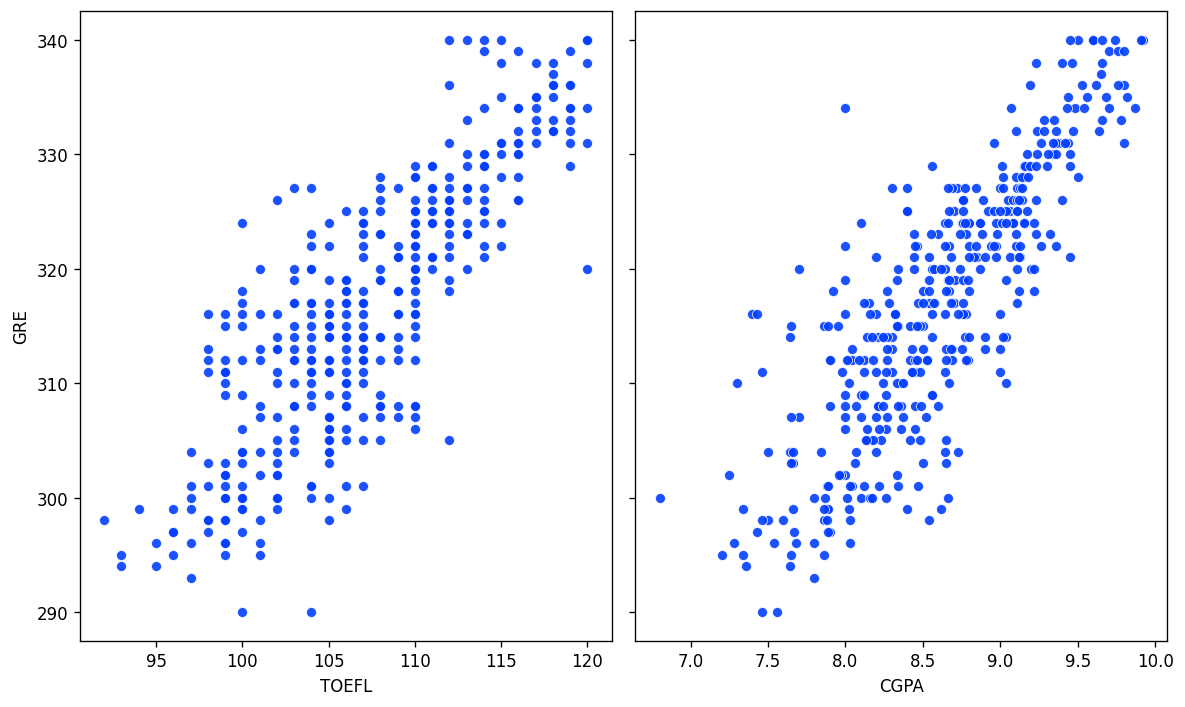

In [ ]:
# Plot some correlations
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6), dpi=120, sharey=True)
sns.scatterplot(data=data, y="GRE", x="TOEFL", alpha=0.9, ax=ax1)
sns.scatterplot(data=data, y="GRE", x="CGPA", alpha=0.9, ax=ax2)
plt.tight_layout()
plt.show()

## K-Means Algorithm

We don't need any target variable (y) because this data unlabeled. Features (X) are the all dataset and instances. I don't want to do data preprocess in this section.

In [ ]:
# Define X(features)
X = data[["GRE", "TOEFL"]]

In [ ]:
# Import K-Means Cluster
from sklearn.cluster import KMeans

# Define num of clusters
k = 3

# Define model
kmeans = KMeans(n_clusters=k, n_init=10)

# Fit and predict
y_preds = kmeans.fit_predict(X)

Each instances was assigned to one of the 3 clusters. In the context of clustering, an instance's *label* is the index of cluster that this instance get assigned to by algorithm.

In [ ]:
# Show the labels
kmeans.labels_[:10]

array([2, 2, 0, 2, 0, 2, 0, 1, 1, 2], dtype=int32)

In [ ]:
# Show the centroids
centroids = kmeans.cluster_centers_
centroids

array([[314.20858896, 105.42944785],
       [300.46987952, 100.57831325],
       [328.36363636, 113.18831169]])

In [ ]:
# Find the min and max values
mins = np.min(X, axis=0) - 1
maxs = np.max(X, axis=0) + 1

# Create a meshgrid
xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                        np.linspace(mins[1], maxs[1], 1000))

In [ ]:
[xx.ravel(), yy.ravel()]

[array([289.        , 289.05205205, 289.1041041 , ..., 340.8958959 ,
        340.94794795, 341.        ]),
 array([ 91.,  91.,  91., ..., 121., 121., 121.])]

### Decision Boundaries

In [ ]:
def plot_data(X):
  sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], color="black")

def plot_centroids(centroids):
  sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker="o", lw=8,
                  s=70, zorder=10, alpha=0.9, edgecolor="green")
  sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker="x", lw=10,
                  color="red", s=4, zorder=11, alpha=1)

def plot_decision_boundaries(model, X, resolution=1000, show_centroids=True):

  # Find the min and max values
  mins = np.min(X, axis=0) - 1
  maxs = np.max(X, axis=0) + 1

  # Create a meshgrid
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))

  # Make prediction
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  # Reshape prediction array
  Z = Z.reshape(xx.shape)

  # Plot the contour
  plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="coolwarm")
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
              linewidths=1, colors="orange")

  # Plot data
  plot_data(X)

  # Show centroids
  if show_centroids:
    plot_centroids(model.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


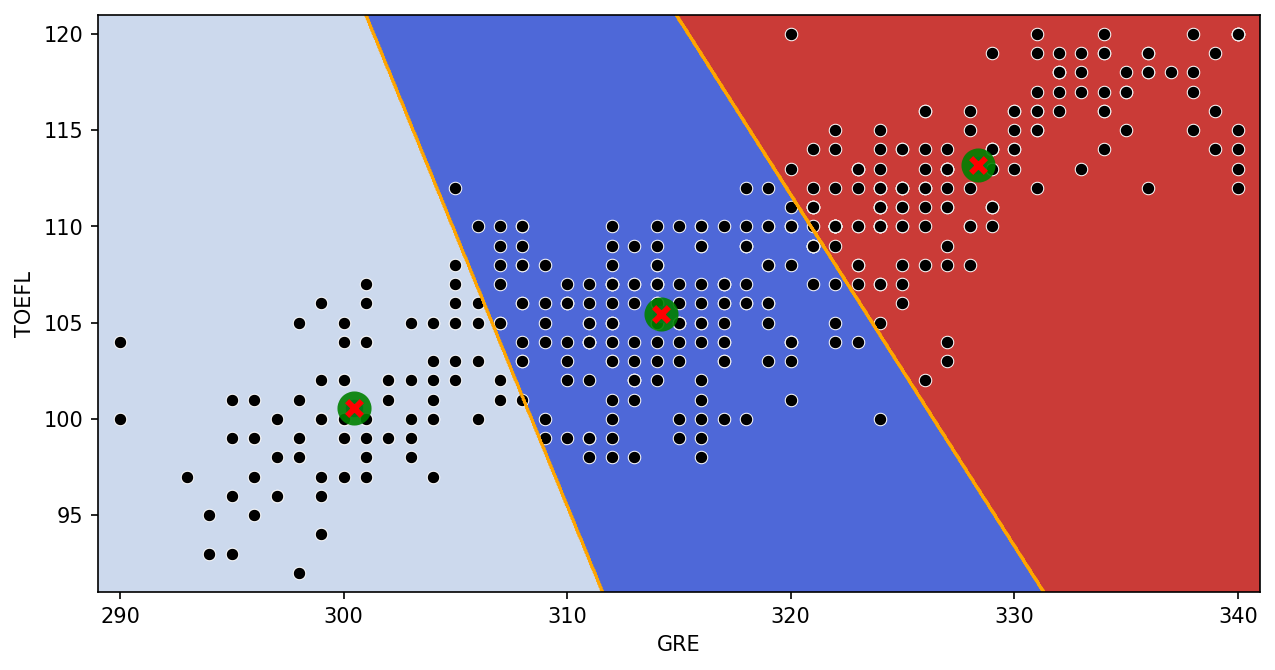

In [ ]:
plt.figure(figsize=(10,5), dpi=150)
plot_decision_boundaries(kmeans, X, show_centroids=True)
plt.show()

### Make Predictions

In [ ]:
# user data
X_new = np.array([[320, 115], [328, 95], [300, 110]])

# Make predictions
kmeans.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2, 0, 1], dtype=int32)

In [ ]:
# Distance for each centroids
kmeans.transform(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([[11.18641633, 24.27778109,  8.55760643],
       [17.29093407, 28.08959082, 18.19194639],
       [14.92561379,  9.43339641, 28.54227039]])

The first instance in **X_new** is loacted at a distance of 11.18 from the first centroid, 8.55 from the second centroid and 24.27 from the third centroid.

### Model's Inertia
K-Means models runs the algorithm `n_init` times and keeps the model with lowest inertia.

In [ ]:
# Inertia
kmeans.inertia_

13748.937613092792

## Choose Num of **k**

### Elbow Method

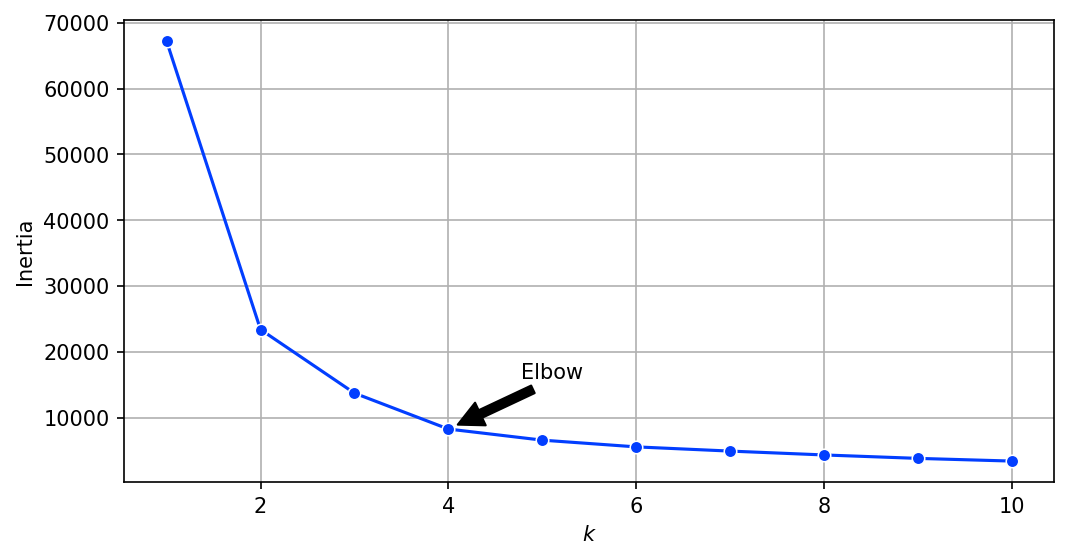

In [ ]:
inertias=[]

for k in range(1, 11):
  model = KMeans(n_clusters=k, n_init=10, random_state=42)
  model.fit(X)
  inertias.append(model.inertia_)

plt.figure(figsize=(8,4), dpi=150)
sns.lineplot(x=range(1, 11), y=inertias, marker="o")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(5, 15000),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(5.1, 16000, "Elbow", horizontalalignment="center")
plt.grid()
plt.show()

### Silhoutte Score

silhouette coefficient $= \dfrac{(b-a)}{max(a, b)}$

silhouette coefficient must be between: $[-1, 1]$

In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette score for first model
silhouette_score(X, kmeans.labels_)

0.47448278596772797

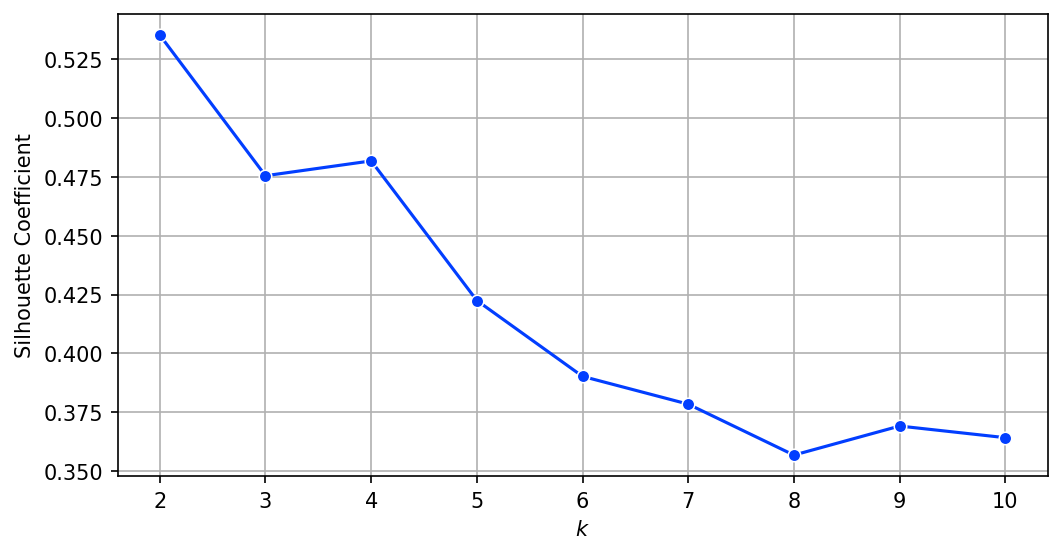

In [ ]:
silhouettes = []

for k in range(2, 11):
  model = KMeans(n_clusters=k, n_init=10, random_state=42)
  model.fit(X)
  score = silhouette_score(X, model.labels_)
  silhouettes.append(score)

plt.figure(figsize=(8,4), dpi=150)
sns.lineplot(x=range(2, 11), y=silhouettes, marker="o")
plt.xlabel("$k$")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()